In [2]:
from HestonFunctions import Heston_explicit_bf, HestonCallClosedForm, PIntegrand, P 
import numpy as np

In [11]:
U_space = Heston_explicit_bf(kappa=2, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=40, J=20, K=100)

100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   

In [26]:
#print(HestonCallClosedForm(lambda_= 2, vbar= 0.2, eta=0.2, rho=-0.8, v0=0, r=0.03, tau=1, S0=200, K=100))

import matplotlib.pyplot as plt

# Define the range of S0 and v0
S0_range = np.linspace(0, 200, 41)
v0_range = np.linspace(0, 1, 21)

# Create a meshgrid of S0 and v0
S0, v0 = np.meshgrid(S0_range, v0_range)

# Initialize the HestonPrice matrix
HestonPrice = np.zeros((len(v0_range), len(S0_range)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range)):
    for j in range(len(S0_range)):
        if S0_range[j] == 0:
            HestonPrice[i][j] = 0
        else:
            HestonPrice[i][j] = HestonCallClosedForm(lambda_= 2, vbar= 0.2, eta=0.2, rho=0.8, v0=v0_range[i], r=0.03, tau=1, S0=S0_range[j], K=100)




In [16]:
print(U_space.T.shape)
print(HestonPrice.shape)

(21, 41)
(21, 41)


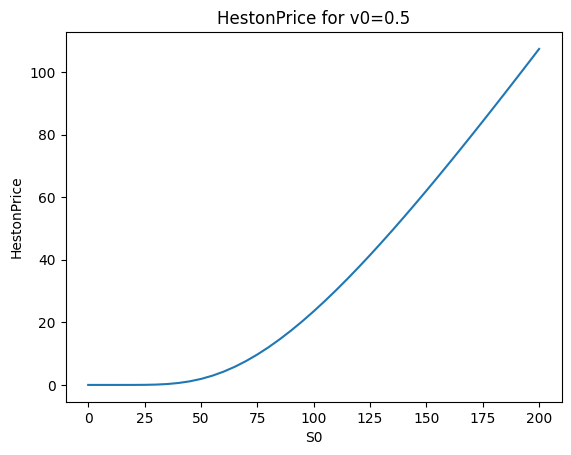

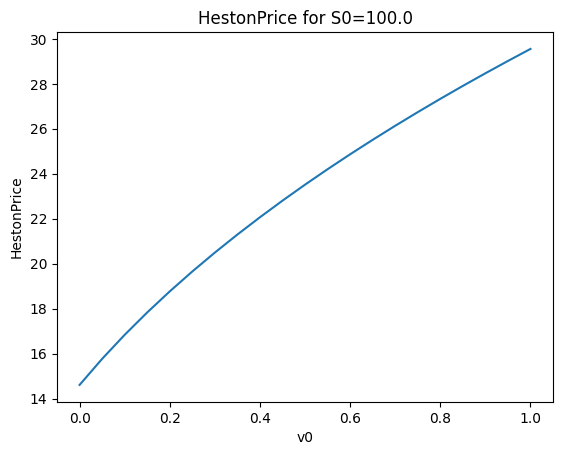

In [17]:
# Fix the value of v0 and plot the line for different values of S0
v0_index = 10
plt.plot(S0_range, HestonPrice[v0_index, :])
plt.xlabel('S0')
plt.ylabel('HestonPrice')
plt.title(f'HestonPrice for v0={v0_range[v0_index]}')
plt.show()

# Fix the value of S0 and plot the line for different values of v0
S0_index = 20
plt.plot(v0_range, HestonPrice[:, S0_index])
plt.xlabel('v0')
plt.ylabel('HestonPrice')
plt.title(f'HestonPrice for S0={S0_range[S0_index]}')
plt.show()


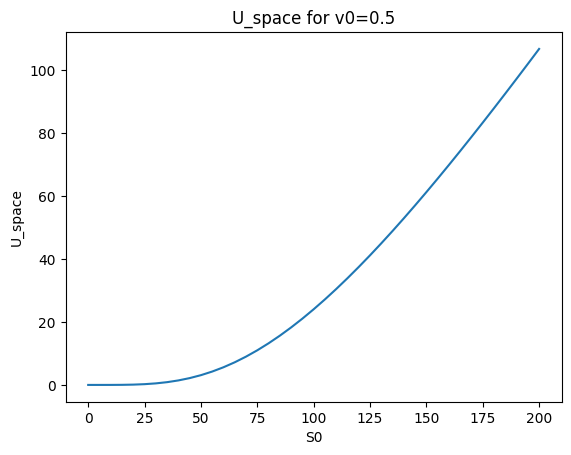

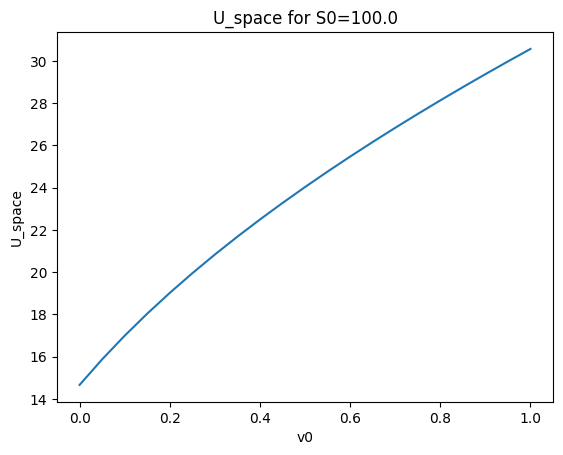

In [19]:
# Fix the value of v0 and plot the line for different values of S0
v0_index = 10
plt.plot(S0_range, U_space.T[v0_index, :])
plt.xlabel('S0')
plt.ylabel('U_space')
plt.title(f'U_space for v0={v0_range[v0_index]}')
plt.show()

# Fix the value of S0 and plot the line for different values of v0
S0_index = 20
plt.plot(v0_range, U_space.T[:, S0_index])
plt.xlabel('v0')
plt.ylabel('U_space')
plt.title(f'U_space for S0={S0_range[S0_index]}')
plt.show()


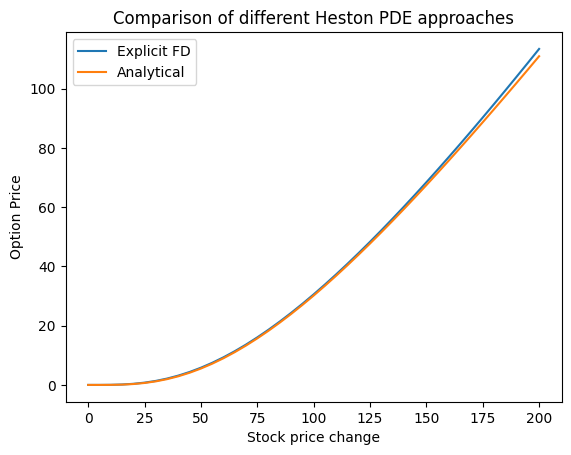

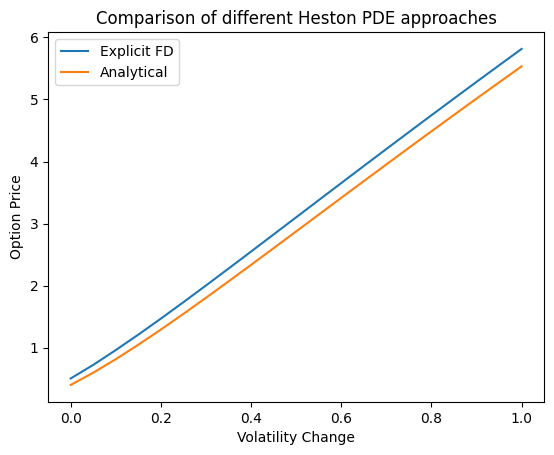

In [30]:
# Fix the value of v0 and plot the line for different values of S0
v0_index = -1
plt.plot(S0_range, U_space.T[v0_index, :], label='Explicit FD')
plt.plot(S0_range, HestonPrice[v0_index, :], label='Analytical')
plt.xlabel('Stock price change')
plt.ylabel('Option Price')
plt.title(f'Comparison of different Heston PDE approaches')
plt.legend()
plt.show()

# Fix the value of S0 and plot the line for different values of v0
S0_index = 10
plt.plot(v0_range, U_space.T[:, S0_index], label='Explicit FD')
plt.plot(v0_range, HestonPrice[:, S0_index], label='Analytical')
plt.xlabel('Volatility Change')
plt.ylabel('Option Price')
plt.title(f'Comparison of different Heston PDE approaches')
plt.legend()
plt.show()


In [58]:
U_space1 = Heston_explicit_bf(kappa=3, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=10, J=10, K=100)
U_space2 = Heston_explicit_bf(kappa=3, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=15, J=15, K=100)
U_space3 = Heston_explicit_bf(kappa=3, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=22, J=22, K=100)
U_space4 = Heston_explicit_bf(kappa=3, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=28, J=28, K=100)
U_space5 = Heston_explicit_bf(kappa=3, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=32, J=32, K=100)
U_space6 = Heston_explicit_bf(kappa=3, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=36, J=36, K=100)
U_space7 = Heston_explicit_bf(kappa=3, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=40, J=38, K=100)
U_space8 = Heston_explicit_bf(kappa=3, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=45, J=40, K=100)





#print(HestonCallClosedForm(lambda_= 2, vbar= 0.2, eta=0.2, rho=-0.8, v0=0, r=0.03, tau=1, S0=200, K=100))

import matplotlib.pyplot as plt


# Define the range of S0 and v0
S0_range1 = np.linspace(0, 200, 11)
v0_range1 = np.linspace(0, 1, 11)

# Create a meshgrid of S0 and v0
S01, v01 = np.meshgrid(S0_range1, v0_range1)

# Initialize the HestonPrice matrix
HestonPrice1 = np.zeros((len(v0_range1), len(S0_range1)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range1)):
    for j in range(len(S0_range1)):
        if S0_range1[j] == 0:
            HestonPrice1[i][j] = 0
        else:
            HestonPrice1[i][j] = HestonCallClosedForm(lambda_= 3, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range1[i], r=0.03, tau=1, S0=S0_range1[j], K=100)




# Define the range of S0 and v0
S0_range2 = np.linspace(0, 200, 16)
v0_range2 = np.linspace(0, 1, 16)

# Create a meshgrid of S0 and v0
S02, v02 = np.meshgrid(S0_range2, v0_range2)

# Initialize the HestonPrice matrix
HestonPrice2 = np.zeros((len(v0_range2), len(S0_range2)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range2)):
    for j in range(len(S0_range2)):
        if S0_range2[j] == 0:
            HestonPrice2[i][j] = 0
        else:
            HestonPrice2[i][j] = HestonCallClosedForm(lambda_= 3, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range2[i], r=0.03, tau=1, S0=S0_range2[j], K=100)





# Define the range of S0 and v0
S0_range3 = np.linspace(0, 200, 23)
v0_range3 = np.linspace(0, 1, 23)

# Create a meshgrid of S0 and v0
S03, v03 = np.meshgrid(S0_range3, v0_range3)

# Initialize the HestonPrice matrix
HestonPrice3 = np.zeros((len(v0_range3), len(S0_range3)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range3)):
    for j in range(len(S0_range3)):
        if S0_range3[j] == 0:
            HestonPrice3[i][j] = 0
        else:
            HestonPrice3[i][j] = HestonCallClosedForm(lambda_= 3, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range3[i], r=0.03, tau=1, S0=S0_range3[j], K=100)




# Define the range of S0 and v0
S0_range4 = np.linspace(0, 200, 29)
v0_range4 = np.linspace(0, 1, 29)

# Create a meshgrid of S0 and v0
S04, v04 = np.meshgrid(S0_range4, v0_range4)

# Initialize the HestonPrice matrix
HestonPrice4 = np.zeros((len(v0_range4), len(S0_range4)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range4)):
    for j in range(len(S0_range4)):
        if S0_range4[j] == 0:
            HestonPrice4[i][j] = 0
        else:
            HestonPrice4[i][j] = HestonCallClosedForm(lambda_= 3, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range4[i], r=0.03, tau=1, S0=S0_range4[j], K=100)





# Define the range of S0 and v0
S0_range5 = np.linspace(0, 200, 33)
v0_range5 = np.linspace(0, 1, 33)

# Create a meshgrid of S0 and v0
S05, v05 = np.meshgrid(S0_range5, v0_range5)

# Initialize the HestonPrice matrix
HestonPrice5 = np.zeros((len(v0_range5), len(S0_range5)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range5)):
    for j in range(len(S0_range5)):
        if S0_range5[j] == 0:
            HestonPrice5[i][j] = 0
        else:
            HestonPrice5[i][j] = HestonCallClosedForm(lambda_= 3, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range5[i], r=0.03, tau=1, S0=S0_range5[j], K=100)





# Define the range of S0 and v0
S0_range6 = np.linspace(0, 200, 37)
v0_range6 = np.linspace(0, 1, 37)

# Create a meshgrid of S0 and v0
S06, v06 = np.meshgrid(S0_range6, v0_range6)

# Initialize the HestonPrice matrix
HestonPrice6 = np.zeros((len(v0_range6), len(S0_range6)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range6)):
    for j in range(len(S0_range6)):
        if S0_range6[j] == 0:
            HestonPrice6[i][j] = 0
        else:
            HestonPrice6[i][j] = HestonCallClosedForm(lambda_= 3, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range6[i], r=0.03, tau=1, S0=S0_range6[j], K=100)




# Define the range of S0 and v0
S0_range7 = np.linspace(0, 200, 41)
v0_range7 = np.linspace(0, 1, 39)

# Create a meshgrid of S0 and v0
S07, v07 = np.meshgrid(S0_range7, v0_range7)

# Initialize the HestonPrice matrix
HestonPrice7 = np.zeros((len(v0_range7), len(S0_range7)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range7)):
    for j in range(len(S0_range7)):
        if S0_range7[j] == 0:
            HestonPrice7[i][j] = 0
        else:
            HestonPrice7[i][j] = HestonCallClosedForm(lambda_= 3, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range7[i], r=0.03, tau=1, S0=S0_range7[j], K=100)





# Define the range of S0 and v0
S0_range8 = np.linspace(0, 200, 46)
v0_range8 = np.linspace(0, 1, 41)

# Create a meshgrid of S0 and v0
S08, v08 = np.meshgrid(S0_range8, v0_range8)

# Initialize the HestonPrice matrix
HestonPrice8 = np.zeros((len(v0_range8), len(S0_range8)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range8)):
    for j in range(len(S0_range8)):
        if S0_range8[j] == 0:
            HestonPrice8[i][j] = 0
        else:
            HestonPrice8[i][j] = HestonCallClosedForm(lambda_= 3, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range8[i], r=0.03, tau=1, S0=S0_range8[j], K=100)






100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps 

In [59]:
def relative_error(A, B):
    # Calculate the error in terms of L_inf norm
    error = np.max(np.abs(A - B))

    # Calculate the L_inf norm of matrix U (assuming U is the matrix A)
    U_norm = np.max(np.sum(np.abs(A), axis=1))

    # Calculate the relative error
    relative_error = error / U_norm

    return relative_error


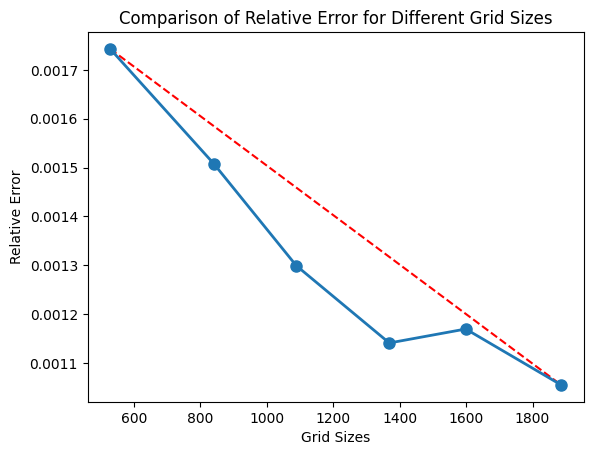

In [65]:
# Calculate relative error
rel_error1 = relative_error(HestonPrice1, U_space1[0].T)
rel_error2 = relative_error(HestonPrice2, U_space2[0].T)
rel_error3 = relative_error(HestonPrice3, U_space3[0].T)
rel_error4 = relative_error(HestonPrice4, U_space4[0].T)
rel_error5 = relative_error(HestonPrice5, U_space5[0].T)
rel_error6 = relative_error(HestonPrice6, U_space6[0].T)
rel_error7 = relative_error(HestonPrice7, U_space7[0].T)
rel_error8 = relative_error(HestonPrice8, U_space8[0].T)



import matplotlib.pyplot as plt

# Define the size of the matrices
matrix_sizes = [  HestonPrice3.size, HestonPrice4.size, HestonPrice5.size, HestonPrice6.size, HestonPrice7.size, HestonPrice8.size]

# Calculate relative error
rel_errors = [  rel_error3, rel_error4, rel_error5, rel_error6, rel_error7, rel_error8]

# Add a linear line from top-left to bottom-right
plt.plot([matrix_sizes[0], matrix_sizes[-1]], [rel_errors[0], rel_errors[-1]], linestyle='--', color='red')

# Plot the line graph with bold markers
plt.plot(matrix_sizes, rel_errors, marker='o', markersize=8, linestyle='-', linewidth=2)
plt.xlabel('Grid Sizes')
plt.ylabel('Relative Error')
plt.title('Comparison of Relative Error for Different Grid Sizes')
plt.show()

Volatility of Volatility variation

In [51]:
sigma_range = np.linspace(0.1, 0.9, 30)
U_space_vol = {}  # Define the dictionary U_space_vol
for i in sigma_range:
    U_space = Heston_explicit_bf(kappa=2, eta=0.2, sigma=i, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=40, J=20, K=100)
    U_space_vol[i] = U_space[0].T


100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps 

In [55]:
# Define the range of S0 and v0
S0_range = np.linspace(0, 200, 41)
v0_range = np.linspace(0, 1, 21)

# Create a meshgrid of S0 and v0
S0, v0 = np.meshgrid(S0_range, v0_range)

# Initialize the HestonPrice matrix
HestonPricevol = np.zeros((len(v0_range), len(S0_range)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range)):
    for j in range(len(S0_range)):
        if S0_range[j] == 0:
            HestonPricevol[i][j] = 0
        else:
            HestonPricevol[i][j] = HestonCallClosedForm(lambda_= 2, vbar= 0.2, eta=0.2, rho=0.8, v0=v0_range[i], r=0.03, tau=1, S0=S0_range[j], K=100)



In [56]:
Relative_error_vol = np.array([])

for key, value in U_space_vol.items():
    relative_error_vol = relative_error(HestonPricevol, value)
    Relative_error_vol = np.append(Relative_error_vol, relative_error_vol)


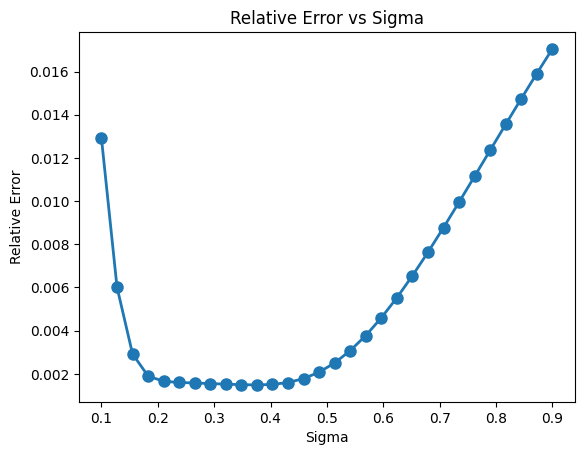

In [71]:
import matplotlib.pyplot as plt

# Create the line plot
plt.plot(sigma_range, Relative_error_vol, marker='o', markersize=8, linestyle='-', linewidth=2)
plt.xlabel('Sigma')
plt.ylabel('Relative Error')
plt.title('Relative Error vs Sigma')
plt.show()

With $\nu=\frac{2 \kappa \theta}{\sigma^2}$ <1 , $ \kappa = 0.15, \theta = 0.2, \sigma = 0.3$ and now $\nu$ ~ 0.66

In [67]:
U_space1 = Heston_explicit_bf(kappa=0.15, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=10, J=10, K=100)
U_space2 = Heston_explicit_bf(kappa=0.15, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=15, J=15, K=100)
U_space3 = Heston_explicit_bf(kappa=0.15, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=22, J=22, K=100)
U_space4 = Heston_explicit_bf(kappa=0.15, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=28, J=28, K=100)
U_space5 = Heston_explicit_bf(kappa=0.15, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=32, J=32, K=100)
U_space6 = Heston_explicit_bf(kappa=0.15, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=36, J=36, K=100)
U_space7 = Heston_explicit_bf(kappa=0.15, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=40, J=38, K=100)
U_space8 = Heston_explicit_bf(kappa=0.15, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=45, J=40, K=100)





#print(HestonCallClosedForm(lambda_= 2, vbar= 0.2, eta=0.2, rho=-0.8, v0=0, r=0.03, tau=1, S0=200, K=100))

import matplotlib.pyplot as plt

# Define the range of S0 and v0
S0_range1 = np.linspace(0, 200, 11)
v0_range1 = np.linspace(0, 1, 11)

# Create a meshgrid of S0 and v0
S01, v01 = np.meshgrid(S0_range1, v0_range1)

# Initialize the HestonPrice matrix
HestonPrice1 = np.zeros((len(v0_range1), len(S0_range1)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range1)):
    for j in range(len(S0_range1)):
        if S0_range1[j] == 0:
            HestonPrice1[i][j] = 0
        else:
            HestonPrice1[i][j] = HestonCallClosedForm(lambda_= 0.15, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range1[i], r=0.03, tau=1, S0=S0_range1[j], K=100)




# Define the range of S0 and v0
S0_range2 = np.linspace(0, 200, 16)
v0_range2 = np.linspace(0, 1, 16)

# Create a meshgrid of S0 and v0
S02, v02 = np.meshgrid(S0_range2, v0_range2)

# Initialize the HestonPrice matrix
HestonPrice2 = np.zeros((len(v0_range2), len(S0_range2)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range2)):
    for j in range(len(S0_range2)):
        if S0_range2[j] == 0:
            HestonPrice2[i][j] = 0
        else:
            HestonPrice2[i][j] = HestonCallClosedForm(lambda_= 0.15, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range2[i], r=0.03, tau=1, S0=S0_range2[j], K=100)





# Define the range of S0 and v0
S0_range3 = np.linspace(0, 200, 23)
v0_range3 = np.linspace(0, 1, 23)

# Create a meshgrid of S0 and v0
S03, v03 = np.meshgrid(S0_range3, v0_range3)

# Initialize the HestonPrice matrix
HestonPrice3 = np.zeros((len(v0_range3), len(S0_range3)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range3)):
    for j in range(len(S0_range3)):
        if S0_range3[j] == 0:
            HestonPrice3[i][j] = 0
        else:
            HestonPrice3[i][j] = HestonCallClosedForm(lambda_= 0.15, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range3[i], r=0.03, tau=1, S0=S0_range3[j], K=100)




# Define the range of S0 and v0
S0_range4 = np.linspace(0, 200, 29)
v0_range4 = np.linspace(0, 1, 29)

# Create a meshgrid of S0 and v0
S04, v04 = np.meshgrid(S0_range4, v0_range4)

# Initialize the HestonPrice matrix
HestonPrice4 = np.zeros((len(v0_range4), len(S0_range4)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range4)):
    for j in range(len(S0_range4)):
        if S0_range4[j] == 0:
            HestonPrice4[i][j] = 0
        else:
            HestonPrice4[i][j] = HestonCallClosedForm(lambda_= 0.15, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range4[i], r=0.03, tau=1, S0=S0_range4[j], K=100)





# Define the range of S0 and v0
S0_range5 = np.linspace(0, 200, 33)
v0_range5 = np.linspace(0, 1, 33)

# Create a meshgrid of S0 and v0
S05, v05 = np.meshgrid(S0_range5, v0_range5)

# Initialize the HestonPrice matrix
HestonPrice5 = np.zeros((len(v0_range5), len(S0_range5)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range5)):
    for j in range(len(S0_range5)):
        if S0_range5[j] == 0:
            HestonPrice5[i][j] = 0
        else:
            HestonPrice5[i][j] = HestonCallClosedForm(lambda_= 0.15, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range5[i], r=0.03, tau=1, S0=S0_range5[j], K=100)





# Define the range of S0 and v0
S0_range6 = np.linspace(0, 200, 37)
v0_range6 = np.linspace(0, 1, 37)

# Create a meshgrid of S0 and v0
S06, v06 = np.meshgrid(S0_range6, v0_range6)

# Initialize the HestonPrice matrix
HestonPrice6 = np.zeros((len(v0_range6), len(S0_range6)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range6)):
    for j in range(len(S0_range6)):
        if S0_range6[j] == 0:
            HestonPrice6[i][j] = 0
        else:
            HestonPrice6[i][j] = HestonCallClosedForm(lambda_= 0.15, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range6[i], r=0.03, tau=1, S0=S0_range6[j], K=100)




# Define the range of S0 and v0
S0_range7 = np.linspace(0, 200, 41)
v0_range7 = np.linspace(0, 1, 39)

# Create a meshgrid of S0 and v0
S07, v07 = np.meshgrid(S0_range7, v0_range7)

# Initialize the HestonPrice matrix
HestonPrice7 = np.zeros((len(v0_range7), len(S0_range7)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range7)):
    for j in range(len(S0_range7)):
        if S0_range7[j] == 0:
            HestonPrice7[i][j] = 0
        else:
            HestonPrice7[i][j] = HestonCallClosedForm(lambda_= 0.15, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range7[i], r=0.03, tau=1, S0=S0_range7[j], K=100)





# Define the range of S0 and v0
S0_range8 = np.linspace(0, 200, 46)
v0_range8 = np.linspace(0, 1, 41)

# Create a meshgrid of S0 and v0
S08, v08 = np.meshgrid(S0_range8, v0_range8)

# Initialize the HestonPrice matrix
HestonPrice8 = np.zeros((len(v0_range8), len(S0_range8)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range8)):
    for j in range(len(S0_range8)):
        if S0_range8[j] == 0:
            HestonPrice8[i][j] = 0
        else:
            HestonPrice8[i][j] = HestonCallClosedForm(lambda_= 0.15, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range8[i], r=0.03, tau=1, S0=S0_range8[j], K=100)






100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps 

c:\Users\Souvik Chakraborty\Desktop\2022 Masters\UvA\Study\2nd year Period 2\Advanced Computational Finance\Heston-FD\HestonFunctions.py:41: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  value, _ = quad(PIntegrand, 0, np.inf, args=(lambda_, vbar, eta, rho, v0, r, tau, S0, K, j))


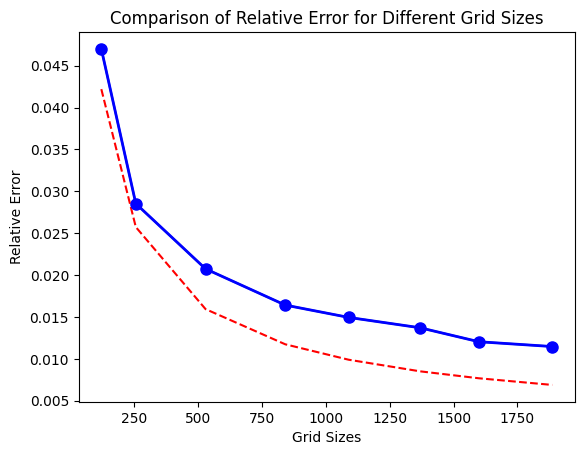

In [70]:
import numpy as np
# Calculate relative error
rel_error1n = relative_error(HestonPrice1, U_space1[0].T)
rel_error2n = relative_error(HestonPrice2, U_space2[0].T)
rel_error3n = relative_error(HestonPrice3, U_space3[0].T)
rel_error4n = relative_error(HestonPrice4, U_space4[0].T)
rel_error5n = relative_error(HestonPrice5, U_space5[0].T)
rel_error6n = relative_error(HestonPrice6, U_space6[0].T)
rel_error7n = relative_error(HestonPrice7, U_space7[0].T)
rel_error8n = relative_error(HestonPrice8, U_space8[0].T)


import matplotlib.pyplot as plt

# Define the size of the matrices
matrix_sizes = [HestonPrice1.size, HestonPrice2.size, HestonPrice3.size, HestonPrice4.size, HestonPrice5.size, HestonPrice6.size, HestonPrice7.size, HestonPrice8.size]

# Calculate relative error
rel_errorsn = [rel_error1n, rel_error2n, rel_error3n, rel_error4n, rel_error5n, rel_error6n, rel_error7n, rel_error8n]


# Add a line with exponent of -0.66
x = np.array(matrix_sizes)
y = np.array(rel_errorsn)
line = np.power(x, -0.66)

plt.plot(x, y)
plt.plot(x, line, linestyle='--', color='red')


# Plot the line graph
plt.plot(matrix_sizes, rel_errorsn, marker='o', markersize=8, linestyle='-', linewidth=2, color='blue')
plt.xlabel('Grid Sizes')
plt.ylabel('Relative Error')
plt.title('Comparison of Relative Error for Different Grid Sizes')
plt.show()


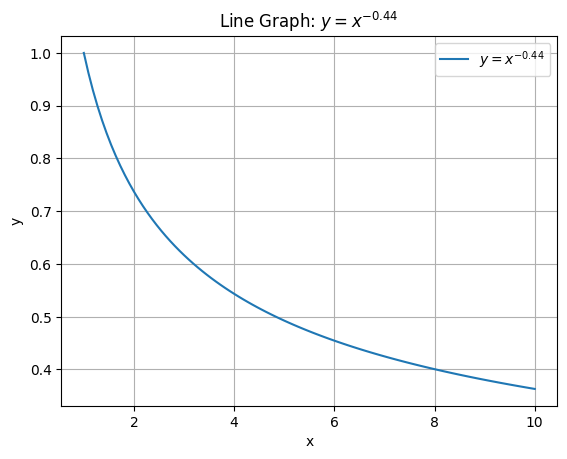

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x_values = np.linspace(1, 10, 100)  # Adjust the range as needed

# Calculate corresponding y values
y_values = x_values**(-0.44)

# Plot the line graph
plt.plot(x_values, y_values, label='$y = x^{-0.44}$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Graph: $y = x^{-0.44}$')
plt.legend()
plt.grid(True)
plt.show()
